In [1]:
from torch.nn import BCEWithLogitsLoss, BCELoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import time
import os
import numpy as np

from Utils import loader
from Train import train
from Model import Model

In [2]:
imdir_rs19 = '/home/physik/Dokumente/rs19/jpgs/rs19_val'
maskdir_rs19 = '/home/physik/Dokumente/rs19/uint8/rs19_val'
classes_ = {"rail-raised"}
range_train = (0,0)
range_test = (2,2)
range_val = (7,8)

In [3]:
traindata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_train[0],
                      numend=range_train[1],
                      classes=classes_)

testdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_test[0],
                      numend=range_test[1],
                      classes=classes_)

valdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_val[0],
                      numend=range_val[1],
                      classes=classes_)

In [4]:
traindata[0][1].shape

torch.Size([1, 1080, 1920])

In [5]:
traindata[0][0].shape

torch.Size([3, 1080, 1920])

In [6]:
traindata[0][1].dtype

torch.float32

In [7]:
traindata[0][1]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [8]:
batchsize = 1
loss = torch.nn.MSELoss()
lr = 0.0009
num_epochs = 50
model_path = ""

In [9]:
model = Model.UNet(num_classes=1)

In [10]:
Trainer = train.TrainSeg(model,
                         traindata,
                         testdata,
                         valdata,
                         classes_,
                         loss,
                         batchsize,
                         lr,
                         num_epochs,
                         model_path)

In [11]:
Trainer.train()

Epoch: 1/50
Train loss: 0.026543, Test loss: 0.0173
Epoch: 2/50
Train loss: 0.025420, Test loss: 0.0168
Epoch: 3/50
Train loss: 0.025295, Test loss: 0.0169
Epoch: 4/50
Train loss: 0.025438, Test loss: 0.0168
Epoch: 5/50
Train loss: 0.025306, Test loss: 0.0169
Epoch: 6/50
Train loss: 0.025229, Test loss: 0.0170
Epoch: 7/50
Train loss: 0.025264, Test loss: 0.0171
Epoch: 8/50
Train loss: 0.025283, Test loss: 0.0170
Epoch: 9/50
Train loss: 0.025252, Test loss: 0.0169
Epoch: 10/50
Train loss: 0.025209, Test loss: 0.0169
Epoch: 11/50
Train loss: 0.025190, Test loss: 0.0169
Epoch: 12/50
Train loss: 0.025196, Test loss: 0.0169
Epoch: 13/50
Train loss: 0.025199, Test loss: 0.0169
Epoch: 14/50
Train loss: 0.025179, Test loss: 0.0169
Epoch: 15/50
Train loss: 0.025142, Test loss: 0.0169
Epoch: 16/50
Train loss: 0.025108, Test loss: 0.0170
Epoch: 17/50
Train loss: 0.025084, Test loss: 0.0170
Epoch: 18/50
Train loss: 0.025064, Test loss: 0.0170
Epoch: 19/50
Train loss: 0.025039, Test loss: 0.0171
Ep

KeyboardInterrupt: 

In [12]:
Trainer.val()

Average Validation Loss: 0.0499



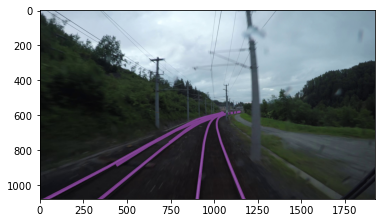

In [13]:
loader.visualize_result(traindata[0][0],traindata[0][1][0,:,:])

In [14]:
result = model(traindata[0][0].unsqueeze(0))

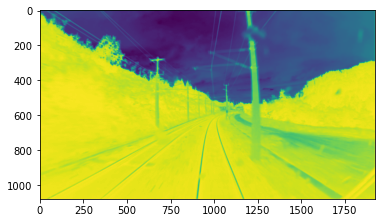

In [15]:
plt.imshow(result.detach().numpy()[0][0])

In [17]:
torch.min(result)

tensor(-0.0092, grad_fn=<MinBackward1>)

In [19]:
result.shape

torch.Size([1, 1, 1080, 1920])

In [21]:
zeros = torch.zeros(result.shape)

In [24]:
loss(traindata[0][0],traindata[0][1])

/home/physik/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1, 1080, 1920])) that is different to the input size (torch.Size([3, 1080, 1920])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.2302)